In [21]:
import sys
!{sys.executable} -m pip install -U pandas-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension
!pip install matplotlib
!pip install graphviz


Requirement already up-to-date: pandas-profiling[notebook] in /opt/conda/lib/python3.7/site-packages (3.1.0)
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


Exploring the data

I got the data from the Government of Ontario and will then store it in a Pandas Data Frame. I will then explore the data. I will then make assessment for modelling.


In [22]:
# import modules needed
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
input_file = 'ltccovidsummary.csv'

# load file, comma delimited is the default
df = pd.read_csv(input_file, header = 0)

In [23]:
print(df.dtypes)

Report_Data_Extracted                       object
LTC_Homes_with_Active_Outbreak               int64
LTC_Homes_with_Resolved_Outbreak             int64
Confirmed_Active_LTC_Resident_Cases          int64
Confirmed_Active_LTC_HCW_Cases               int64
Total_LTC_Resident_Deaths                    int64
Total_LTC_HCW_Deaths                         int64
Active_Outbreaks_with_No_Resident_Cases    float64
dtype: object


I will create a few more columns to account for the difference in active cases and deaths. 


In [24]:
df['Diff_Confirmed_Active_LTC_Resident_Cases'] = df['Confirmed_Active_LTC_Resident_Cases'].diff()
df['Diff_Total_LTC_Resident_Deaths'] = df['Total_LTC_Resident_Deaths'].diff()
df['Diff_Confirmed_Active_LTC_HCW_Cases'] = df['Confirmed_Active_LTC_HCW_Cases'].diff()
df['Diff_Total_LTC_HCW_Deaths'] = df['Total_LTC_HCW_Deaths'].diff()
dates= df['Report_Data_Extracted']
date_format = [pd.to_datetime(d) for d in dates]

In [25]:
# Let's display first 10 records 
df.head(10)

,Report_Data_Extracted,LTC_Homes_with_Active_Outbreak,LTC_Homes_with_Resolved_Outbreak,Confirmed_Active_LTC_Resident_Cases,Confirmed_Active_LTC_HCW_Cases,Total_LTC_Resident_Deaths,Total_LTC_HCW_Deaths,Active_Outbreaks_with_No_Resident_Cases,Diff_Confirmed_Active_LTC_Resident_Cases,Diff_Total_LTC_Resident_Deaths,Diff_Confirmed_Active_LTC_HCW_Cases,Diff_Total_LTC_HCW_Deaths
0,2020-04-24,145,31,2455,1120,625,1,NaN,NaN,NaN,NaN,NaN
1,2020-04-25,147,31,2520,1161,654,1,NaN,65.0,29.0,41.0,0.0
2,2020-04-26,150,32,2523,1187,671,1,NaN,3.0,17.0,26.0,0.0
3,2020-04-27,154,34,2491,1205,705,1,NaN,-32.0,34.0,18.0,0.0
4,2020-04-28,159,34,2632,1361,775,1,NaN,141.0,70.0,156.0,0.0
5,2020-04-29,163,34,2614,1430,835,1,NaN,-18.0,60.0,69.0,0.0
6,2020-04-30,166,35,2722,1482,861,1,NaN,108.0,26.0,52.0,0.0
7,2020-05-01,167,36,2682,1541,910,2,NaN,-40.0,49.0,59.0,1.0
8,2020-05-02,170,36,2719,1594,954,2,NaN,37.0,44.0,53.0,0.0
9,2020-05-03,175,37,2751,1619,972,3,NaN,32.0,18.0,25.0,1.0


In [26]:
# look at meta information about data, such as null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 12 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Report_Data_Extracted                     501 non-null    object 
 1   LTC_Homes_with_Active_Outbreak            501 non-null    int64  
 2   LTC_Homes_with_Resolved_Outbreak          501 non-null    int64  
 3   Confirmed_Active_LTC_Resident_Cases       501 non-null    int64  
 4   Confirmed_Active_LTC_HCW_Cases            501 non-null    int64  
 5   Total_LTC_Resident_Deaths                 501 non-null    int64  
 6   Total_LTC_HCW_Deaths                      501 non-null    int64  
 7   Active_Outbreaks_with_No_Resident_Cases   248 non-null    float64
 8   Diff_Confirmed_Active_LTC_Resident_Cases  500 non-null    float64
 9   Diff_Total_LTC_Resident_Deaths            500 non-null    float64
 10  Diff_Confirmed_Active_LTC_HCW_Cases   

Covid 19 can have outbreaks easily, making it very hard to predict

In [27]:
# Let's see meta information about numeric data, we can also see if there any extreme values
df.describe()

,LTC_Homes_with_Active_Outbreak,LTC_Homes_with_Resolved_Outbreak,Confirmed_Active_LTC_Resident_Cases,Confirmed_Active_LTC_HCW_Cases,Total_LTC_Resident_Deaths,Total_LTC_HCW_Deaths,Active_Outbreaks_with_No_Resident_Cases,Diff_Confirmed_Active_LTC_Resident_Cases,Diff_Total_LTC_Resident_Deaths,Diff_Confirmed_Active_LTC_HCW_Cases,Diff_Total_LTC_HCW_Deaths
count,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,248.000000,500.000000,500.0000,500.000000,500.000000
mean,71.830339,355.870259,423.007984,357.129741,2776.013972,9.578842,37.754032,-4.862000,6.3960,-2.190000,0.024000
std,69.617075,128.110379,683.086990,454.740076,970.037903,2.732814,45.740599,36.493541,11.7275,24.660864,0.177446
min,2.000000,31.000000,0.000000,4.000000,625.000000,1.000000,0.000000,-206.000000,-7.0000,-121.000000,0.000000
25%,16.000000,288.000000,23.000000,35.000000,1848.000000,8.000000,2.000000,-6.250000,0.0000,-7.000000,0.000000
50%,46.000000,316.000000,61.000000,138.000000,2781.000000,8.000000,19.000000,0.000000,1.0000,0.000000,0.000000
75%,108.000000,487.000000,591.000000,507.000000,3766.000000,13.000000,60.250000,2.250000,7.0000,4.250000,0.000000
max,256.000000,522.000000,2831.000000,1736.000000,3823.000000,13.000000,145.000000,141.000000,71.0000,156.000000,2.000000


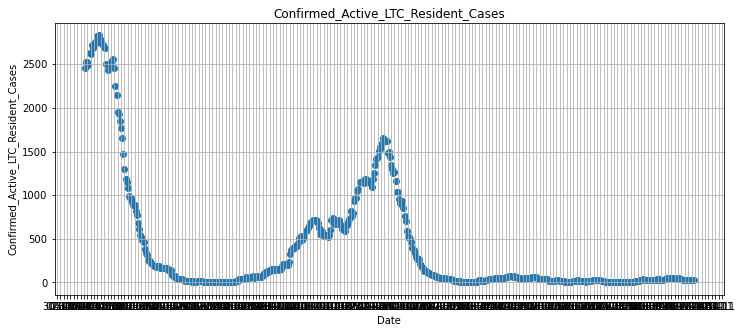

In [28]:
variable = 'Confirmed_Active_LTC_Resident_Cases'
fig, ax = plt.subplots(figsize=(12, 5))
ax.grid()
ax.scatter(date_format,df[variable])
ax.set(xlabel="Date",ylabel=variable,title=variable)
date_form = DateFormatter("%d-%m")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.DayLocator(interval = 3))
fig.savefig(variable + '.png')
plt.show()



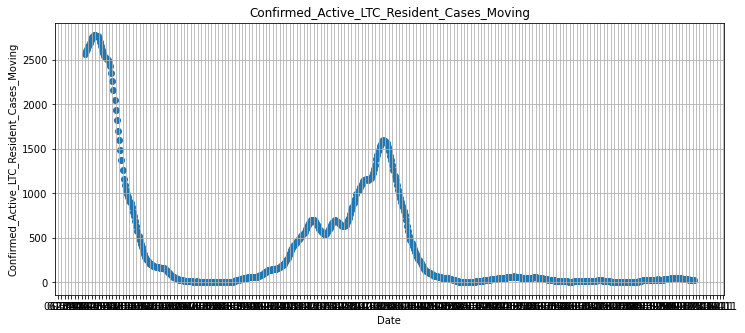

In [29]:
rolling_average_days = 7
df['Confirmed_Active_LTC_Resident_Cases_Moving'] = df['Confirmed_Active_LTC_Resident_Cases'].rolling(window=rolling_average_days).mean()
variable = 'Confirmed_Active_LTC_Resident_Cases_Moving'
fig, ax = plt.subplots(figsize=(12, 5))
ax.grid()
ax.scatter(date_format,df[variable])
ax.set(xlabel="Date",ylabel=variable,title=variable)
date_form = DateFormatter("%d-%m")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.DayLocator(interval = 3))
fig.savefig(variable + '.png')
plt.show()

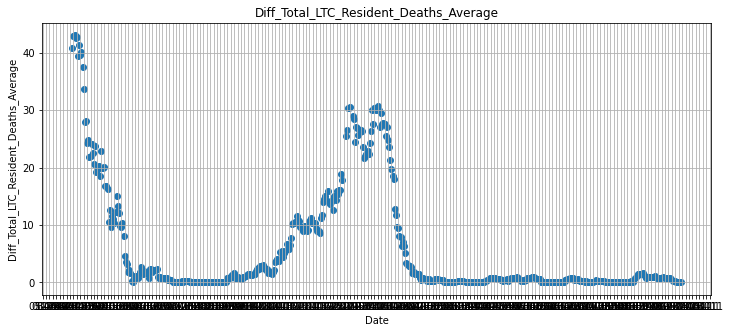

In [30]:
rolling_average_days = 7
df['Diff_Total_LTC_Resident_Deaths_Average'] = df['Diff_Total_LTC_Resident_Deaths'].rolling(window=rolling_average_days).mean()
variable = 'Diff_Total_LTC_Resident_Deaths_Average'
fig, ax = plt.subplots(figsize=(12, 5))
ax.grid()
ax.scatter(date_format,df[variable])
ax.set(xlabel="Date",ylabel=variable,title=variable)
date_form = DateFormatter("%d-%m")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.DayLocator(interval = 3))
fig.savefig(variable + '.png')
plt.show()

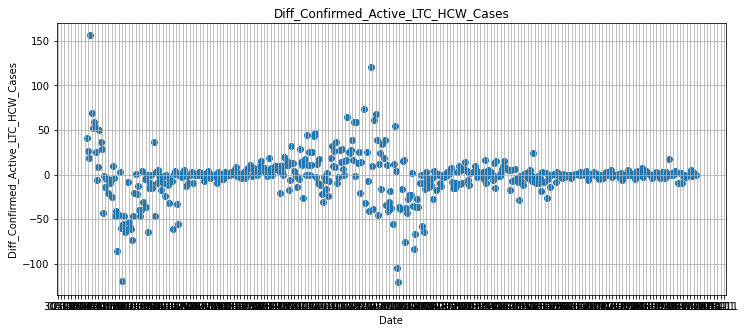

In [31]:
variable_worker = 'Diff_Confirmed_Active_LTC_HCW_Cases'
fig, ax = plt.subplots(figsize=(12, 5))
ax.grid()
ax.scatter(date_format,df[variable_worker])
ax.set(xlabel="Date",ylabel=variable_worker,title=variable_worker)
date_form = DateFormatter("%d-%m")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.DayLocator(interval = 3))
fig.savefig(variable_worker + '.png')
plt.show()

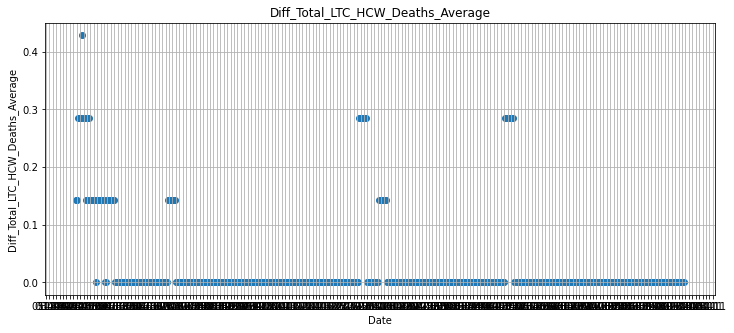

In [32]:
rolling_average_days = 7
df['Diff_Total_LTC_HCW_Deaths_Average'] = df['Diff_Total_LTC_HCW_Deaths'].rolling(window=rolling_average_days).mean()
variable = 'Diff_Total_LTC_HCW_Deaths_Average'
fig, ax = plt.subplots(figsize=(12, 5))
ax.grid()
ax.scatter(date_format,df[variable])
ax.set(xlabel="Date",ylabel=variable,title=variable)
date_form = DateFormatter("%d-%m")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.DayLocator(interval = 3))
fig.savefig(variable + '.png')
plt.show()

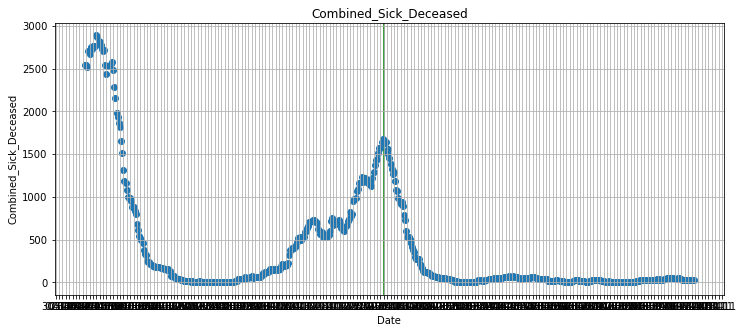

In [33]:
df['Combined_Sick_Deceased'] = df['Diff_Total_LTC_Resident_Deaths'] + df['Confirmed_Active_LTC_Resident_Cases']
variable = 'Combined_Sick_Deceased'
fig, ax = plt.subplots(figsize=(12, 5))
ax.grid()
ax.scatter(date_format,df[variable])
ax.set(xlabel="Date",ylabel=variable,title=variable)
date_form = DateFormatter("%d-%m")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.DayLocator(interval = 3))
ax.axvline(datetime(2021, 1, 15), c="green", zorder=0)
fig.savefig(variable + '.png')
plt.show()

In [34]:
from sklearn import linear_model
X = date_format
y = df['Combined_Sick_Deceased'].tolist()[1:]
# date format is not suitable for modeling, let's transform the date into incrementals number starting from Jan 15
starting_date = 264  # Jan 15 is the 264th day of the series
day_numbers = []
for i in range(1, len(X)):
    day_numbers.append([i])
X = day_numbers
# # let's train our model only with data after the peak
X = X[starting_date:]
y = y[starting_date:]
# Instantiate Linear Regression
linear_regr = linear_model.LinearRegression()
# Train the model using the training sets
linear_regr.fit(X, y)
print ("Linear Regression Model Score: %s" % (linear_regr.score(X, y)))

Linear Regression Model Score: 0.3100379575005995



Predict future trend

The model has now been evaluated positively using its R² score. The linear regression model doesn't work too well as outside factors can heavily influence outbreaks (government policy etc). I can now try to predict the evolution of Combined_Sick_Deceased in the future. This is achieved by using the function predict()and the maximum error is monitored by the model with the function max_error(). Using that value, two lines can be createdy that will depict the tolerance buffer, with both minimum and maximum errors of the model's predictions.


In [35]:
# Predict future trend
from sklearn.metrics import max_error
import math
y_pred = linear_regr.predict(X)
error = max_error(y, y_pred)



The model is now ready for predicting Combined_Sick_Deceased for next days. A variable 'X_test' is defined, which contains both past and future days. Another variable 'future_days' containing the number of days for which we want to estimate the epidemic trend. The model is then applied to X_test. 

In [41]:
X_test = []
future_days = 60
for i in range(starting_date, starting_date + future_days):
    X_test.append([i])
y_pred_linear = linear_regr.predict(X_test)

The variable y_pred_linear contains the predicted Combined_Sick_Deceased for next 60 days. In order to consider the errors made by the model, y_pred_max and y_pred_min contain the y_pred + error and y_pred - error, respectively.

In [42]:
y_pred_max = []
y_pred_min = []
for i in range(0, len(y_pred_linear)):
    y_pred_max.append(y_pred_linear[i] + error)
    y_pred_min.append(y_pred_linear[i] - error)

Plot the forecast

y_pred, y_pred_max and y_pred_min will contain the predictions. Maximum error and minimum error will be included as well. Convert numbers (represented by the X_test variable) to dates.


In [43]:
from datetime import datetime, timedelta
date_zero = datetime.strptime(df['Report_Data_Extracted'][starting_date], '%Y-%m-%d')
# create x_ticks to make graph look cool
date_prev = []
x_ticks = []
step = 5
data_curr = date_zero
x_current = starting_date
n = int(future_days / step)
for i in range(0, n):
    date_prev.append(str(data_curr.day) + "/" + str(data_curr.month))
    x_ticks.append(x_current)
    data_curr = data_curr + timedelta(days=step)
    x_current = x_current + step

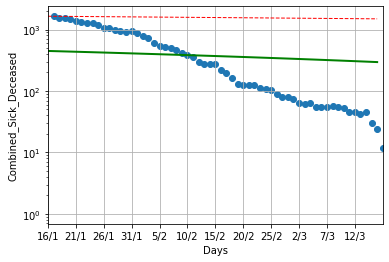

In [44]:
# plot known data
plt.grid()
plt.scatter(X, y)
# plot linear regression prediction
plt.plot(X_test, y_pred_linear, color='green', linewidth=2)
# plot maximum error
plt.plot(X_test, y_pred_max, color='red', linewidth=1, linestyle='dashed')
#plot minimum error
plt.plot(X_test, y_pred_min, color='red', linewidth=1, linestyle='dashed')
plt.xlabel('Days')
plt.xlim(starting_date, starting_date + future_days)
plt.xticks(x_ticks, date_prev)
plt.ylabel('Combined_Sick_Deceased')
plt.yscale("log")
plt.savefig("prediction.png")
plt.show()

Now the tricky part. Trying to predict the end of cases of Covid 19 in Ontario using this data. Although COVID 19 is unpredicatable, there are downward trends. I am optimistic that Ontario will be at 0 cases in long term care homes by Oct 2022 as the latest date.

In [45]:
import math
def n_to_date(n):
    #it converts a number to a date, considering starting from starting_date
    return (date_zero + timedelta(days=n-starting_date)).strftime('%m/%d/%Y')
def build_line(x1,y1,x2,y2):
    m = float(y2 - y1)/(x2-x1)
    q = y1 - (m*x1)
    return [m,q]

data_zero = round(- linear_regr.intercept_ / linear_regr.coef_[0])

line_max = build_line(X_test[0][0], y_pred_max[0], X_test[1][0], y_pred_max[1])
data_zero_max = math.ceil(- line_max[1] / line_max[0])
data_zero_max = n_to_date(data_zero_max)

line_min = build_line(X_test[0][0], y_pred_min[0], X_test[1][0], y_pred_min[1])
data_zero_min = math.floor(- line_min[1] / line_min[0])
data_zero_min = n_to_date(data_zero_min)
print ()
print ("Zero cases and deaths expected between %s and %s" % (data_zero_min,data_zero_max))


Zero cases and deaths expected between 04/01/2020 and 10/14/2022
